# Trabalho Computacional - Processos Estocásticos

In [93]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

plt.style.use('ggplot')

In [199]:
def get_peak(yf, n) -> float:
    yf[0] = 0
    normalized = np.abs(yf) / n
    return np.max(normalized)

def get_frequency(xf, yf) -> float:
    yf[0] = 0
    return xf[np.argmax(np.abs(yf))]

## Lendo os Dados

In [7]:
def read_data(path: str):
    return np.genfromtxt(path, delimiter=",")

In [14]:
Fs = 10 * 10**3

normal = read_data("data/normal.csv")
failing = read_data("data/failing.csv")
unknown = read_data("data/unknown.csv")

## Analisando Cada Conjunto

### MIT Normal

#### Análise no Tempo

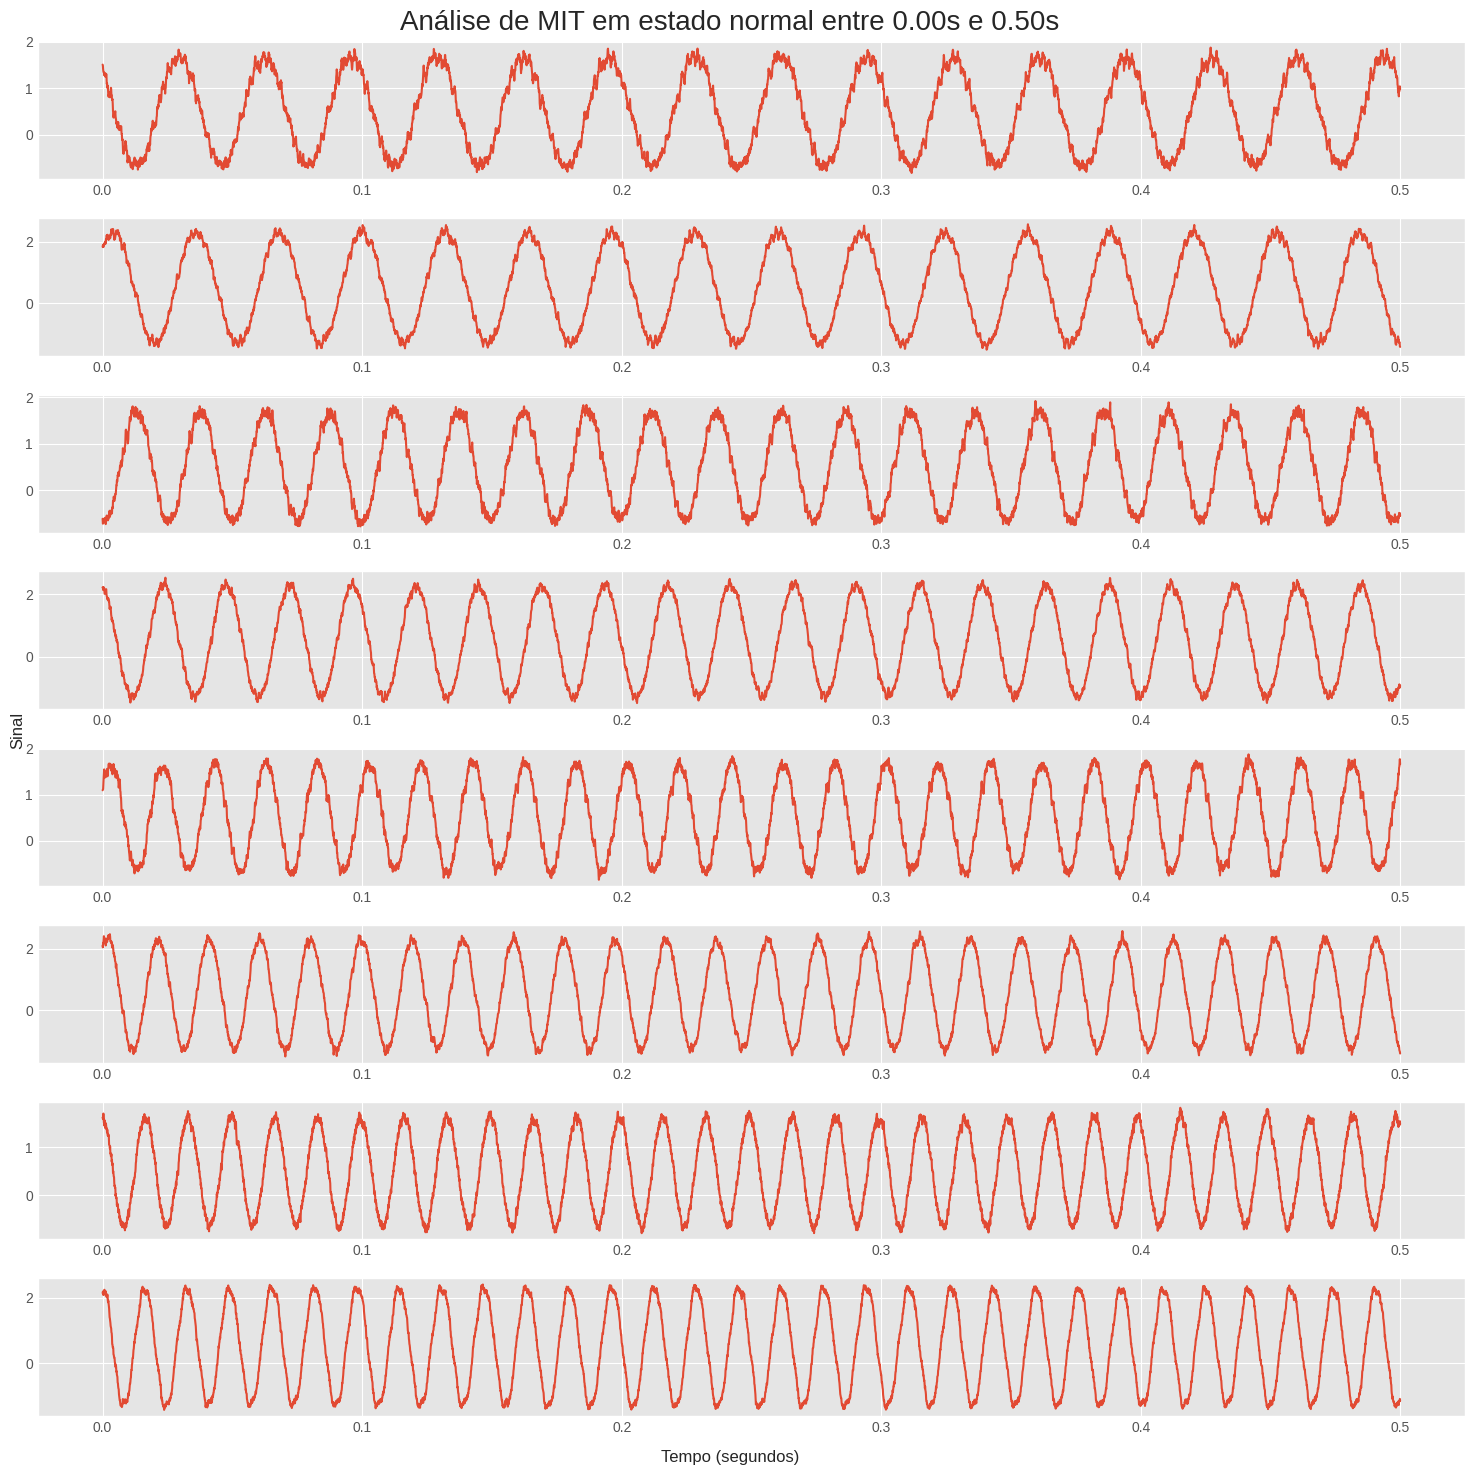

In [66]:
#the window to inspect
lo = 0
hi = .5

fig, axs = plt.subplots(len(normal), 1, figsize=(15,15))

for i, signal in enumerate(normal):

  time = np.arange(lo,hi, 1/Fs)

  axs[i].plot(time, signal[lo*Fs:lo*Fs + len(time)])
  axs[i].grid(True)

fig.suptitle(f"Análise de MIT em estado normal entre {lo:.2f}s e {hi:.2f}s", fontsize=20)
fig.supxlabel("Tempo (segundos)")
fig.supylabel("Sinal")
fig.tight_layout()

fig.savefig("results/MIT-Normal.png")

plt.show()

#### Análise na Frequência

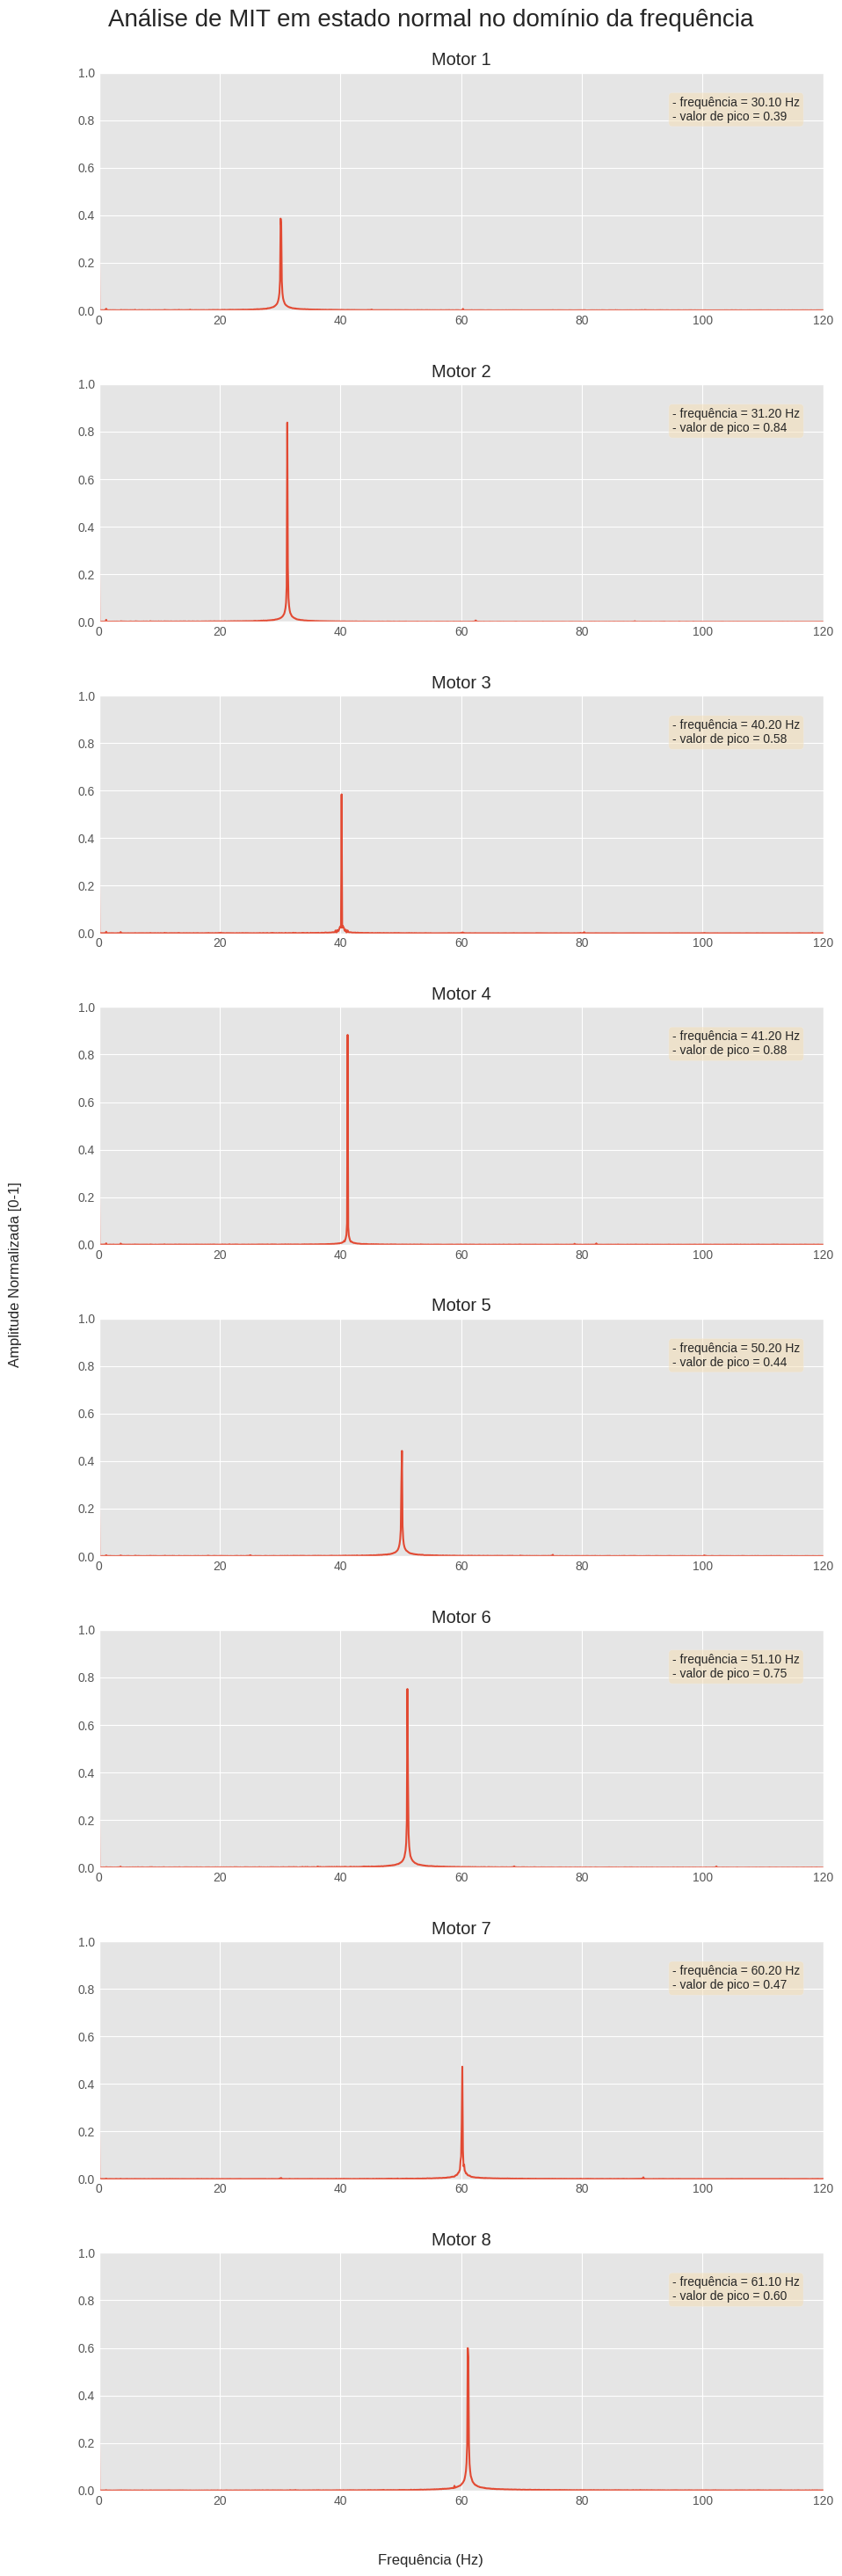

In [201]:
fig, axs = plt.subplots(len(normal), 1, figsize=(10,30))

for i, signal in enumerate(normal):
  N = len(signal)


  yf = fft(signal)[0:N//2]
  xf = fftfreq(N, 1/Fs)[:N//2]

  axs[i].set_title(f"Motor {i+1}")
  axs[i].plot(xf, np.abs(yf) / N)
  axs[i].grid(True)
  axs[i].axis(xmin = 0, xmax=120, ymin=0, ymax=1)
  
  freq = get_frequency(xf, yf)
  peak = get_peak(yf, N)

  annotations = '\n'.join((
    f'- frequência = {freq:.2f} Hz',
    f'- valor de pico = {peak:.2f}'
  ))

  axs[i].text(95, 0.8, annotations, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


fig.suptitle(f"Análise de MIT em estado normal no domínio da frequência", fontsize=20)
fig.supxlabel("Frequência (Hz)")
fig.supylabel("Amplitude Normalizada [0-1]")
fig.tight_layout(pad=3)

fig.savefig("results/MIT-Normal-FFT.png")

plt.show()

### MIT com Defeito

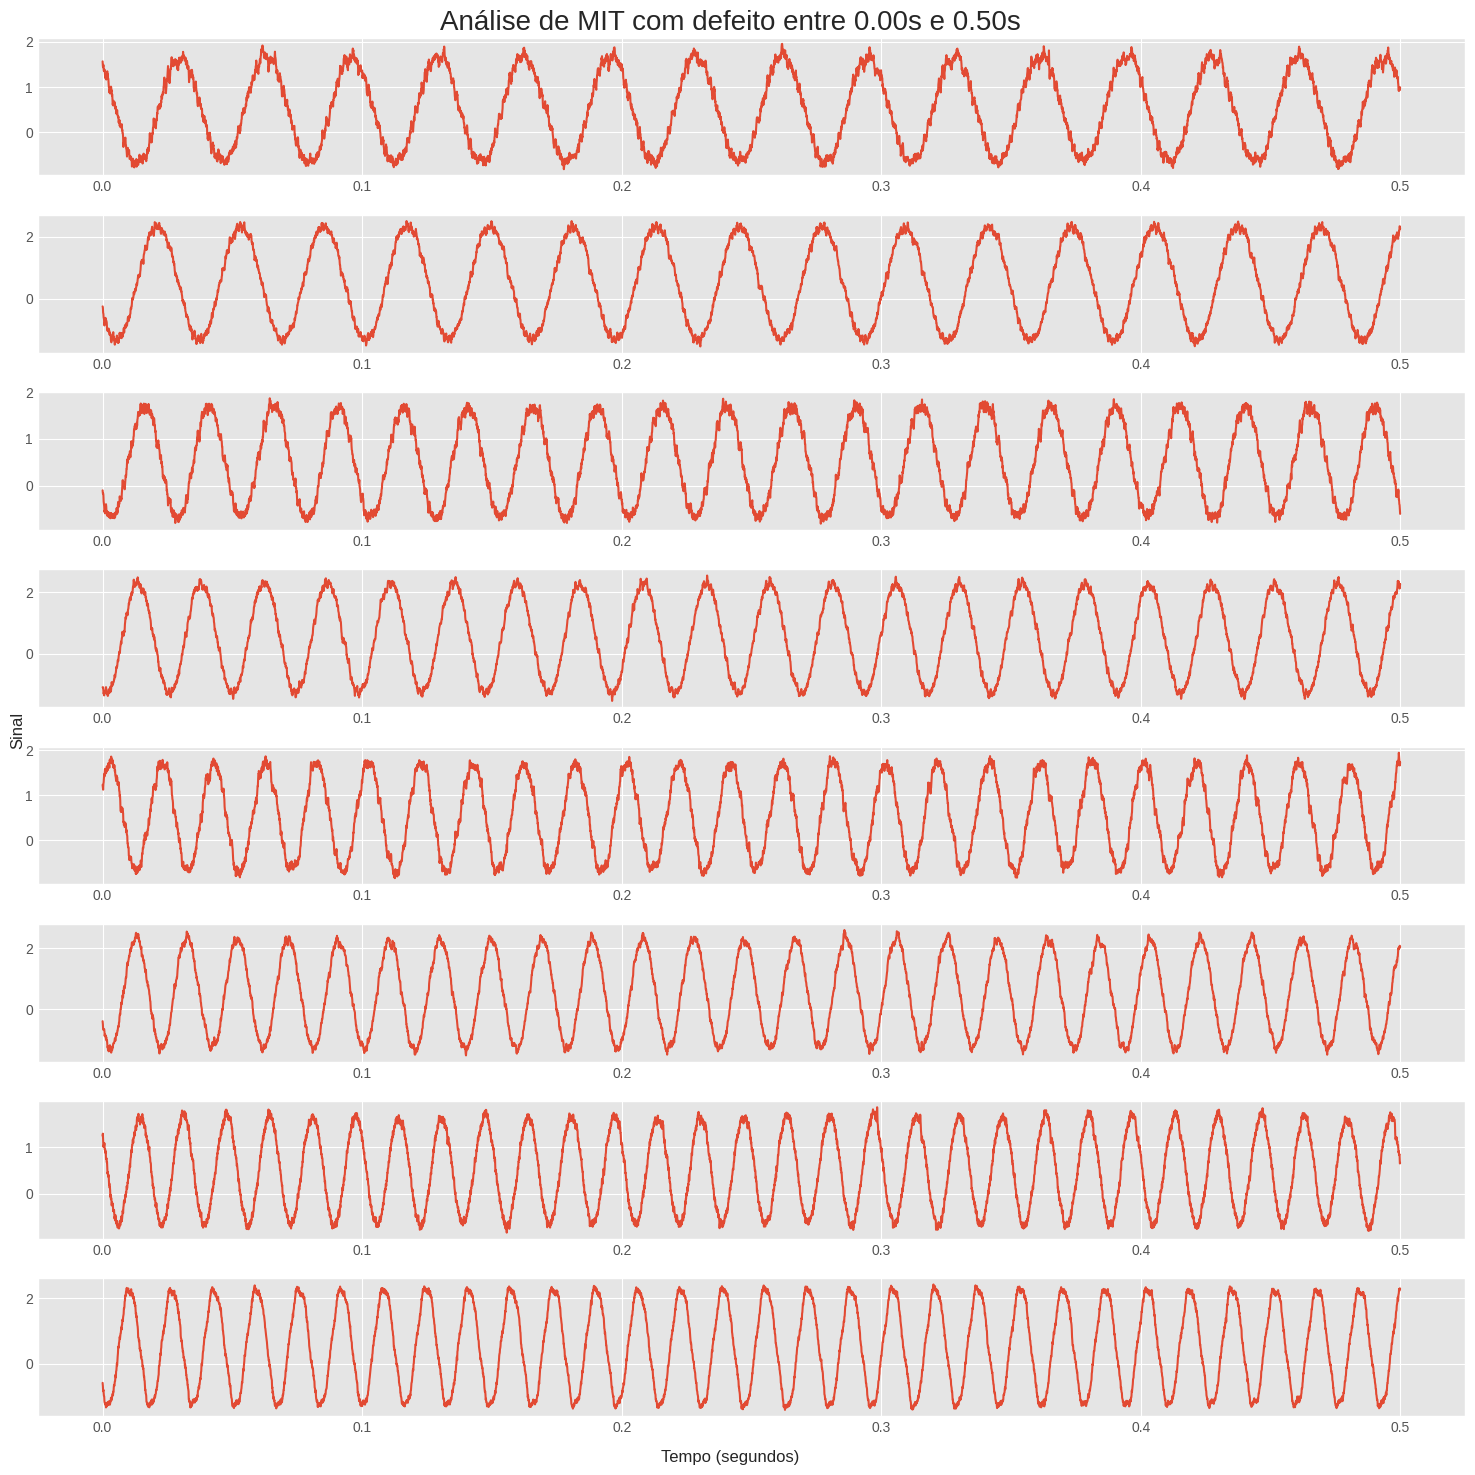

In [65]:
#the window to inspect
lo = 0
hi = .5

fig, axs = plt.subplots(len(failing), 1, figsize=(15,15))

for i, signal in enumerate(failing):

  time = np.arange(lo,hi, 1/Fs)

  axs[i].plot(time, signal[lo*Fs:lo*Fs + len(time)])
  axs[i].grid(True)

fig.suptitle(f"Análise de MIT com defeito entre {lo:.2f}s e {hi:.2f}s", fontsize=20)
fig.supxlabel("Tempo (segundos)")
fig.supylabel("Sinal")
fig.tight_layout()

fig.savefig("results/MIT-Defeito.png")

plt.show()

#### Análise na Frequência

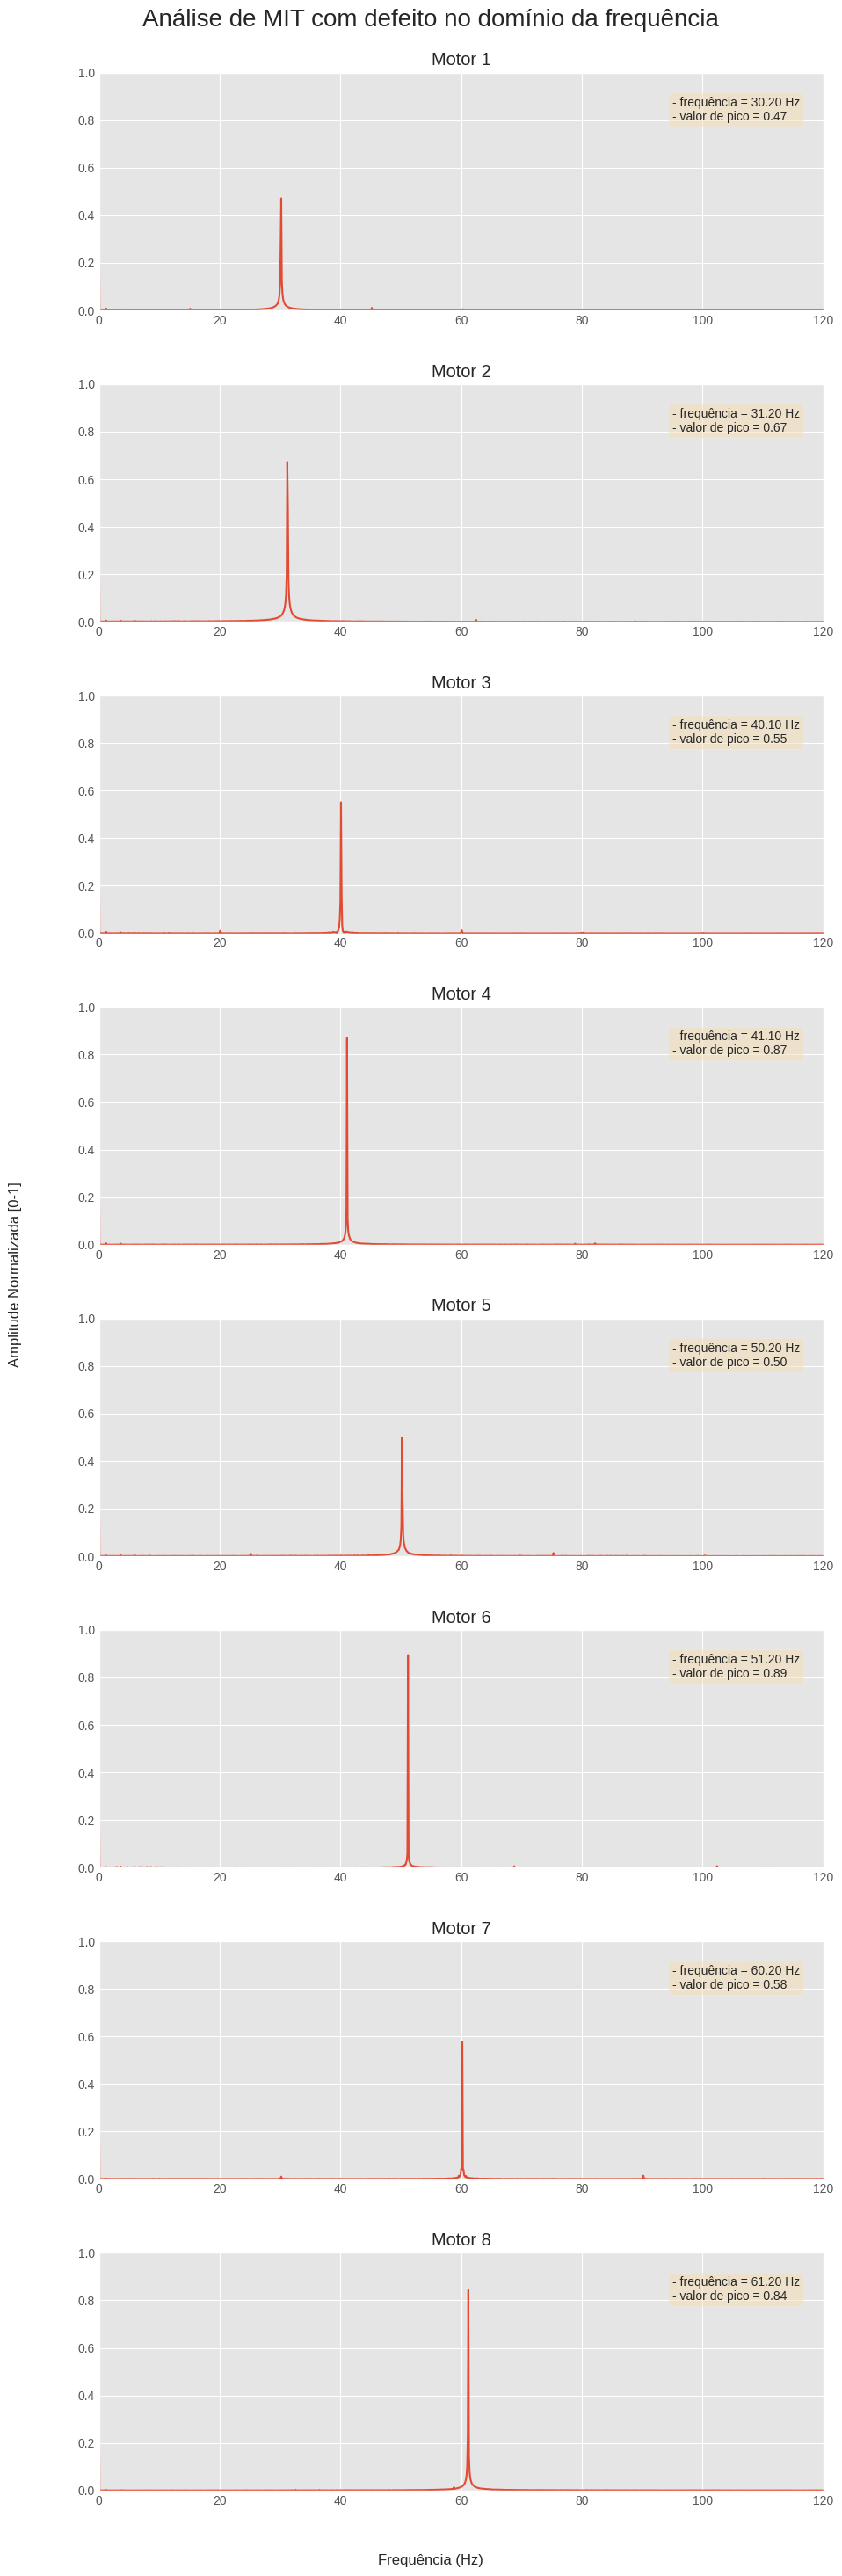

In [202]:
fig, axs = plt.subplots(len(failing), 1, figsize=(10,30))

for i, signal in enumerate(failing):
  N = len(signal)


  yf = fft(signal)[0:N//2]
  xf = fftfreq(N, 1/Fs)[:N//2]

  axs[i].set_title(f"Motor {i+1}")
  axs[i].plot(xf, np.abs(yf) / N)
  axs[i].grid(True)
  axs[i].axis(xmin = 0, xmax=120, ymin=0, ymax=1)
  
  freq = get_frequency(xf, yf)
  peak = get_peak(yf, N)

  annotations = '\n'.join((
    f'- frequência = {freq:.2f} Hz',
    f'- valor de pico = {peak:.2f}'
  ))

  axs[i].text(95, 0.8, annotations, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig.suptitle(f"Análise de MIT com defeito no domínio da frequência", fontsize=20)
fig.supxlabel("Frequência (Hz)")
fig.supylabel("Amplitude Normalizada [0-1]")
fig.tight_layout(pad=3)

fig.savefig("results/MIT-Defeito-FFT.png")

plt.show()